<a href="https://colab.research.google.com/github/Valeeew/Analyze-bookstore-sales/blob/main/correlation_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Analyse & corrélation__
>## __Par Valentin Monteiro__

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
!git clone -l -s git://github.com/Valeeew/Analyze-bookstore-sales cloned-repo
%cd cloned-repo
!ls

Cloning into 'cloned-repo'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (49/49), done.
remote: Total 55 (delta 32), reused 16 (delta 6), pack-reused 0
Receiving objects: 100% (55/55), 18.45 MiB | 2.81 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/cloned-repo/cloned-repo
correlation_testing.ipynb  products.csv		Turnover_analyze.ipynb
customers.csv		   Sales_analyze.ipynb
DATA_library.csv	   transactions.csv


In [20]:
df = pd.read_csv("DATA_library.csv")
df = df.set_index("Unnamed: 0")
# Je decide de supprimer le 4 gros client, je pense que ces DATA peut avoir un net influence sur me corrélation
dfall = df 
df = df[(df.client_id.isin(["c_1609","c_3454","c_4958","c_6714"]))==False]
df

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,class_age
Unnamed: 0,,,,,,,,,,
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,37,35-39
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,3.99,0.0,f,1986,37,35-39
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,13.21,0.0,f,1986,37,35-39
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,19.37,0.0,f,1986,37,35-39
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,8.99,0.0,f,1986,37,35-39
...,...,...,...,...,...,...,...,...,...,...
679327,0_1509,2021-05-15 08:17:35.835342,s_34762,c_8114,4.99,0.0,m,1962,61,60-64
679328,1_152,2021-11-08 17:12:27.637349,s_116675,c_240,11.06,1.0,m,1998,25,25-29
679329,2_207,2021-06-01 04:31:16.088314,s_42418,c_305,50.99,2.0,f,1996,27,25-29


In [21]:
df.corr()

,price,categ,birth,age
price,1.000000,0.669363,0.197664,-0.197664
categ,0.669363,1.000000,0.084258,-0.084258
birth,0.197664,0.084258,1.000000,-1.000000
age,-0.197664,-0.084258,-1.000000,1.000000


In [22]:
dfall.corr()

,price,categ,birth,age
price,1.000000,0.671767,0.209439,-0.209439
categ,0.671767,1.000000,0.099222,-0.099222
birth,0.209439,0.099222,1.000000,-1.000000
age,-0.209439,-0.099222,-1.000000,1.000000


In [23]:
def comatrix(data_frame):
  mask = np.triu(np.ones_like(data_frame.corr(), dtype=bool))
  plt.figure(figsize = [12,8])
  sns.heatmap(data_frame.corr(),mask=mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmin=-1, vmax=1)
  plt.show()

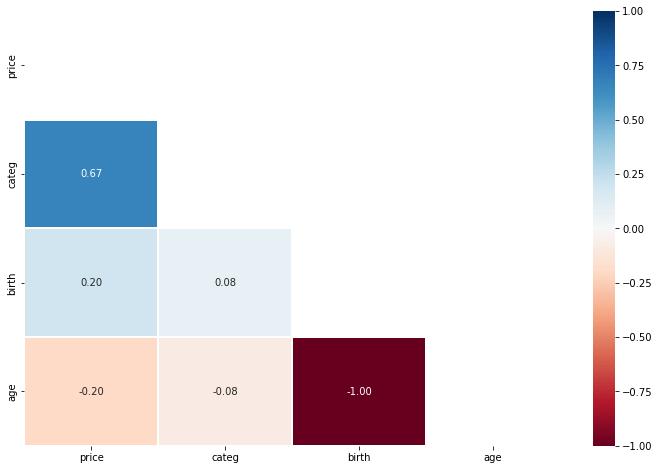

In [24]:
comatrix(df)

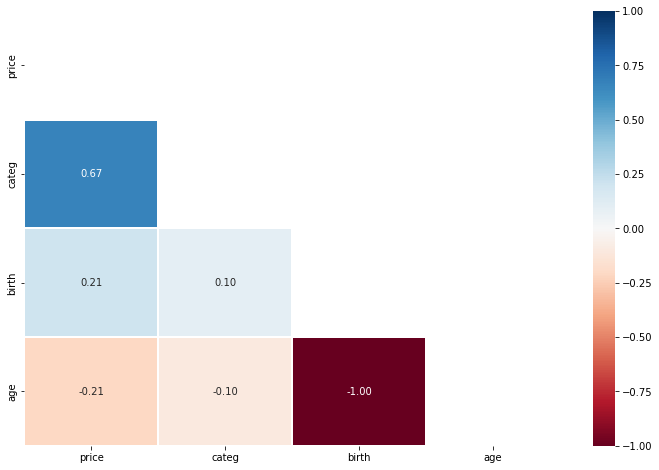

In [25]:
comatrix(dfall)